Applications DataFrame:
            Applied at   Amount  Age  Gender                      Industry  \
0  11.30.2022 10:26:37  12000.0   29    Male                    Blockchain   
1  11.30.2022 10:26:39      NaN   36    Male  Public services / Government   
2  11.30.2022 10:26:58   7500.0   34    Male          Adtech / Advertising   
3  11.30.2022 10:27:31   1500.0   23  Female                       Telecom   
4  11.30.2022 10:27:34   8400.0   33  Female                    Automotive   

  Marital status  External Rating  \
0          Other              8.0   
1         Single              3.0   
2         Single              4.0   
3         Single              0.0   
4         Single              6.0   

                                     Education level         Location  \
0  Higher Degree (bachelor's, specialist's, maste...    Spain, Madrid   
1  Higher Degree (bachelor's, specialist's, maste...              NaN   
2  Higher Degree (bachelor's, specialist's, maste...   Poland, Wa

<ipython-input-1-dbefa757ae9d>:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Week'] = filtered_df['Applied at'].dt.isocalendar().week


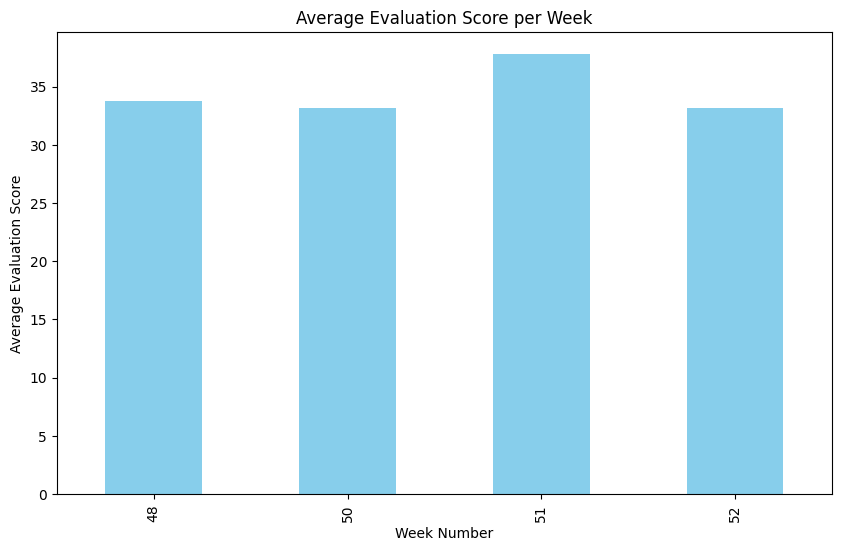

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the specified paths
applications_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/applications.csv')
industries_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/industries.csv')

# Print the initial dataframes
print("Applications DataFrame:")
print(applications_df.head())
print("\nIndustries DataFrame:")
print(industries_df.head())

# Step 1: Remove duplicates based on the applicant_id column
applications_df.drop_duplicates(subset='applicant_id', inplace=True)
print("\nApplications DataFrame after removing duplicates:")
print(applications_df.head())

# Step 2: Fill missing values in the External Rating column with 0
applications_df['External Rating'].fillna(0, inplace=True)
print("\nApplications DataFrame after filling missing External Rating values with 0:")
print(applications_df[['applicant_id', 'External Rating']].head())

# Step 3: Fill missing values in the Education level column with "Average"
applications_df['Education level'].fillna('Average', inplace=True)
print("\nApplications DataFrame after filling missing Education level values with 'Average':")
print(applications_df[['applicant_id', 'Education level']].head())

# Step 4: Merge the applications DataFrame with the industries DataFrame on the 'Industry' column
merged_df = pd.merge(applications_df, industries_df, on='Industry', how='left')
print("\nMerged DataFrame:")
print(merged_df.head())

# Step 5: Convert 'Applied at' to datetime, allowing pandas to infer the format
merged_df['Applied at'] = pd.to_datetime(merged_df['Applied at'], errors='coerce')
print("\nMerged DataFrame after converting 'Applied at' to datetime:")
print(merged_df[['applicant_id', 'Applied at']].head())

# Step 6: Calculate the evaluation score
def calculate_evaluation(row):
    if pd.isna(row['Amount']) or row['External Rating'] == 0:
        return 0

    score = 0

    # Age between 35 and 55
    if 35 <= row['Age'] <= 55:
        score += 20

    # Application submitted on a weekend
    if row['Applied at'].weekday() >= 5:  # 5 and 6 correspond to Saturday and Sunday
        score += 20

    # Marital status is married
    if row['Marital status'].lower() == 'married':
        score += 20

    # Location is Kyiv or region
    if 'kyiv' in str(row['Location']).lower():
        score += 10

    # Industry score
    score += row['Score']

    # External Rating
    if row['External Rating'] >= 7:
        score += 20
    elif row['External Rating'] <= 2:
        score -= 20

    return score

merged_df['Evaluation'] = merged_df.apply(calculate_evaluation, axis=1)
print("\nMerged DataFrame after calculating Evaluation scores:")
print(merged_df[['applicant_id', 'Evaluation']].head())

# Step 7: Filter out applications with an evaluation score less than or equal to 0
filtered_df = merged_df[merged_df['Evaluation'] > 0]
print("\nFiltered DataFrame (only accepted applications):")
print(filtered_df.head())

# Step 8: Group by the week of application and calculate the average evaluation score
filtered_df['Week'] = filtered_df['Applied at'].dt.isocalendar().week
weekly_avg = filtered_df.groupby('Week')['Evaluation'].mean()
print("\nAverage Evaluation Score per Week:")
print(weekly_avg)

# Plotting the results
plt.figure(figsize=(10, 6))
weekly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Evaluation Score per Week')
plt.xlabel('Week Number')
plt.ylabel('Average Evaluation Score')
plt.show()
